# <p style="background-color:#c3c3e6;font-family:newtimeroman;color:#09095e;font-size:150%;text-align:center;border-radius:10px 10px;">♦  Tp : 1  ♦ </p>

<div>
    <h2 style="color:#09095e ;text-align: left;"><span style="letter-spacing: 2px;">Réalisé par :</span></h2>
   
</div>

<div style="text-align: left;">
    <b><li>Salwa Faraj</li></b>
    
    
   
</div>

# 1ère Partie : Introduction théorique et installation

In [2]:
pip install scikit-fuzzy


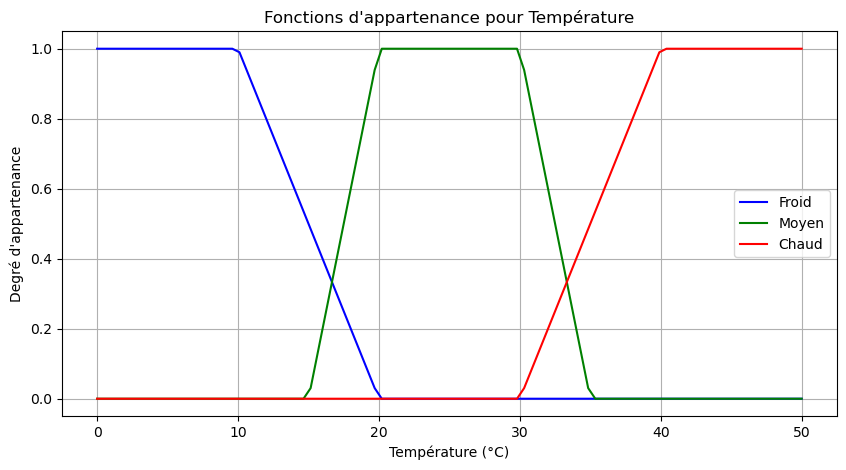

In [3]:
import skfuzzy
import floulib

import numpy as np 

import skfuzzy as fuzz  

import matplotlib.pyplot as plt  


x_temp = np.linspace(0, 50, 100)  


froid = fuzz.trapmf(x_temp, [0, 0, 10, 20])       
moyen = fuzz.trapmf(x_temp, [15, 20, 30, 35])     
chaud = fuzz.trapmf(x_temp, [30, 40, 50, 50])     


plt.figure(figsize=(10, 5))  
plt.plot(x_temp, froid, 'b', label='Froid')  
plt.plot(x_temp, moyen, 'g', label='Moyen')  
plt.plot(x_temp, chaud, 'r', label='Chaud')  
plt.title("Fonctions d'appartenance pour Température")  
plt.xlabel("Température (°C)")  
plt.ylabel("Degré d'appartenance")  
# Afficher le graphique
plt.legend()  
plt.grid()  
plt.show()

# 2ème Partie : Système flou pour le contrôle de température

In [4]:
from skfuzzy import control as ctrl
# Définir la variable d'entrée Température
temperature = ctrl.Antecedent(np.arange(0, 51, 1), 'Température')
temperature['Froid'] = fuzz.trapmf(temperature.universe, [0, 0, 10, 20])
temperature['Moyen'] = fuzz.trapmf(temperature.universe, [15, 20, 30, 35])
temperature['Chaud'] = fuzz.trapmf(temperature.universe, [30, 40, 50, 50])

# Définir la variable de sortie Chauffage
chauffage = ctrl.Consequent(np.arange(0, 101, 1), 'Chauffage')
chauffage['Faible'] = fuzz.trimf(chauffage.universe, [0, 0, 50])
chauffage['Moyenne'] = fuzz.trimf(chauffage.universe, [25, 50, 75])
chauffage['Forte'] = fuzz.trimf(chauffage.universe, [50, 100, 100])


# Définition des règles floues
rule1 = ctrl.Rule(temperature['Froid'], chauffage['Forte'])
rule2 = ctrl.Rule(temperature['Moyen'], chauffage['Moyenne'])
rule3 = ctrl.Rule(temperature['Chaud'], chauffage['Faible'])


# Création du système de contrôle et simulation
heating_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
heating = ctrl.ControlSystemSimulation(heating_ctrl)


# Exemple de simulation avec une température ambiante de 18 degrés
heating.input['Température'] = 18

# Calcul de la puissance de chauffage
heating.compute()

# Résultat
print("Puissance de chauffage suggérée : {:.2f}%".format(heating.output['Chauffage']))


Puissance de chauffage suggérée : 57.52%


# 3ème Partie : Exploitation avancée de la bibliothèque FloLib

In [27]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Création des variables d'entrée et de sortie
distance = ctrl.Antecedent(np.arange(0, 101, 1), 'distance')  # Distance de 0 à 100 mètres
visibilite = ctrl.Antecedent(np.arange(0, 101, 1), 'visibilite')  # Visibilité de 0 à 100 %
vitesse = ctrl.Consequent(np.arange(0, 121, 1), 'vitesse')  # Vitesse de 0 à 120 km/h

In [28]:
# Définition des fonctions d'appartenance pour la distance
distance['proche'] = fuzz.trapmf(distance.universe, [0, 0, 20, 40])
distance['moyenne'] = fuzz.trapmf(distance.universe, [30, 50, 50, 70])
distance['lointaine'] = fuzz.trapmf(distance.universe, [60, 80, 100, 100])

# Définition des fonctions d'appartenance pour la visibilité
visibilite['faible'] = fuzz.trapmf(visibilite.universe, [0, 0, 20, 40])
visibilite['moyenne'] = fuzz.trapmf(visibilite.universe, [30, 50, 50, 70])
visibilite['bonne'] = fuzz.trapmf(visibilite.universe, [60, 80, 100, 100])

# Définition des fonctions d'appartenance pour la vitesse
vitesse['ralentir'] = fuzz.trimf(vitesse.universe, [0, 0, 60])
vitesse['moderee'] = fuzz.trimf(vitesse.universe, [40, 60, 80])
vitesse['rapide'] = fuzz.trimf(vitesse.universe, [60, 120, 120])

In [29]:
# Création des règles
rule1 = ctrl.Rule(distance['proche'] & visibilite['faible'], vitesse['ralentir'])
rule2 = ctrl.Rule(distance['proche'] & visibilite['moyenne'], vitesse['ralentir'])
rule3 = ctrl.Rule(distance['moyenne'] & visibilite['faible'], vitesse['ralentir'])
rule4 = ctrl.Rule(distance['moyenne'] & visibilite['moyenne'], vitesse['moderee'])
rule5 = ctrl.Rule(distance['moyenne'] & visibilite['bonne'], vitesse['rapide'])
rule6 = ctrl.Rule(distance['lointaine'] & visibilite['faible'], vitesse['moderee'])
rule7 = ctrl.Rule(distance['lointaine'] & visibilite['moyenne'], vitesse['rapide'])
rule8 = ctrl.Rule(distance['lointaine'] & visibilite['bonne'], vitesse['rapide'])

In [30]:
# Création du système de contrôle
vitesse_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])
vitesse_simulateur = ctrl.ControlSystemSimulation(vitesse_ctrl)

# Fonction de simulation de vitesse
def simuler_vitesse(distance_value, visibilite_value):
    vitesse_simulateur.input['distance'] = distance_value
    vitesse_simulateur.input['visibilite'] = visibilite_value
    vitesse_simulateur.compute()  # Calculer la sortie
    return vitesse_simulateur.output['vitesse']

# Scénarios de test
scenarios = [
    (20, 10),  # Distance proche et faible visibilité
    (70, 30),  # Distance lointaine et faible visibilité
    (30, 50),  # Distance moyenne et visibilité moyenne
]

# Afficher les résultats
for distance_value, visibilite_value in scenarios:
    vitesse_recommandee = simuler_vitesse(distance_value, visibilite_value)
    print(f'Distance: {distance_value}, Visibilité: {visibilite_value} -> Vitesse recommandée: {vitesse_recommandee:.2f} km/h')

Distance: 20, Visibilité: 10 -> Vitesse recommandée: 20.00 km/h
Distance: 70, Visibilité: 30 -> Vitesse recommandée: 60.00 km/h
Distance: 30, Visibilité: 50 -> Vitesse recommandée: 23.33 km/h


In [31]:
# Exemple de modification des seuils pour la distance
distance['proche'] = fuzz.trapmf(distance.universe, [0, 0, 15, 30])  # Rapprochement de la fonction
distance['moyenne'] = fuzz.trapmf(distance.universe, [25, 45, 55, 75])
distance['lointaine'] = fuzz.trapmf(distance.universe, [70, 85, 100, 100])

In [32]:
rule9 = ctrl.Rule(distance['moyenne'] & visibilite['faible'], vitesse['ralentir'])

In [33]:
# Nouvelle règle de sécurité pour ralentir si la visibilité est très faible
rule10 = ctrl.Rule(visibilite['faible'], vitesse['ralentir'])

In [35]:
# Scénarios de test
new_scenarios = [
    (20, 10),  # Distance proche et faible visibilité
    (70, 30),  # Distance lointaine et faible visibilité
    (30, 50),  # Distance moyenne et visibilité moyenne
    (10, 10),  # Distance très proche et visibilité très faible
    (50, 10),  # Distance moyenne et visibilité très faible
    (30, 90),  # Distance moyenne et bonne visibilité
]

# Afficher les résultats
for distance_value, visibilite_value in new_scenarios:
    try:
        vitesse_recommandee = simuler_vitesse(distance_value, visibilite_value)
        print(f'Distance: {distance_value}, Visibilité: {visibilite_value} -> Vitesse recommandée: {vitesse_recommandee:.2f} km/h')
    except RuntimeError as e:
        print(f"Erreur lors de la simulation pour Distance: {distance_value}, Visibilité: {visibilite_value}: {e}")

Distance: 20, Visibilité: 10 -> Vitesse recommandée: 20.00 km/h
Distance: 70, Visibilité: 30 -> Vitesse recommandée: 60.00 km/h
Distance: 30, Visibilité: 50 -> Vitesse recommandée: 23.33 km/h
Erreur lors de la simulation pour Distance: 10, Visibilité: 10: Unable to resolve rule execution order. The most likely reason is two or more rules that depend on each other.
Please check the rule graph for loops.
Erreur lors de la simulation pour Distance: 50, Visibilité: 10: Unable to resolve rule execution order. The most likely reason is two or more rules that depend on each other.
Please check the rule graph for loops.
Erreur lors de la simulation pour Distance: 30, Visibilité: 90: Unable to resolve rule execution order. The most likely reason is two or more rules that depend on each other.
Please check the rule graph for loops.
